<a href="https://colab.research.google.com/github/Dimas0824/PCVK/blob/main/Pertemuan1/Masking_name_Kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

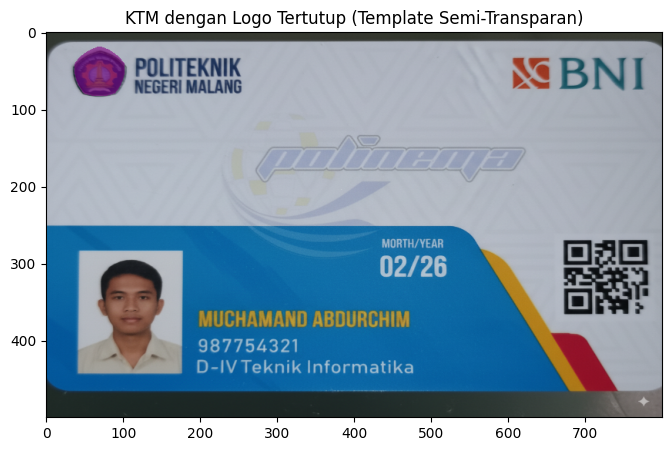

Hasil disimpan di: /content/drive/MyDrive/PCVK/Images/KTM9_masked.png


In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --- path gambar ---
ktm_path = '/content/drive/MyDrive/PCVK/Images/KTM/KTM_OHIM.png'
template_path = '/content/drive/MyDrive/PCVK/Images/logopolinema.png'

# baca gambar
img = cv.imread(ktm_path)
template = cv.imread(template_path, cv.IMREAD_UNCHANGED)

# resize KTM ke ukuran standar
def standardize_ktm_size(image, target_width=800, target_height=500):
    return cv.resize(image, (target_width, target_height))

img_std = standardize_ktm_size(img)

# siapkan mask dari template
if template.shape[2] == 4:
    template_alpha = template[:, :, 3]
else:
    gray_temp = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    _, template_alpha = cv.threshold(gray_temp, 10, 255, cv.THRESH_BINARY)

# fungsi untuk apply mask transparan
def apply_shape_mask(image, mask, center_x, center_y, color=(128,0,128), alpha=0.6):
    out = image.copy()
    h, w = mask.shape[:2]
    x0, y0 = int(center_x - w // 2), int(center_y - h // 2)
    x1, y1 = x0 + w, y0 + h
    ix0, iy0 = max(0, x0), max(0, y0)
    ix1, iy1 = min(out.shape[1], x1), min(out.shape[0], y1)
    if ix0 >= ix1 or iy0 >= iy1:
        return out
    mx0, my0 = ix0 - x0, iy0 - y0
    mx1, my1 = mx0 + (ix1 - ix0), my0 + (iy1 - iy0)
    mask_roi = mask[my0:my1, mx0:mx1]
    roi = out[iy0:iy1, ix0:ix1].copy()
    overlay = roi.copy()
    overlay[mask_roi==255] = np.array(color, dtype=np.uint8)
    blended = cv.addWeighted(overlay, alpha, roi, 1 - alpha, 0)
    out[iy0:iy1, ix0:ix1] = blended
    return out

# --- tempatkan logo secara manual
center_x, center_y =69,50   # koordinat pusat logo setelah resize ke 800x500
desired_w = 66
desired_h = int((template.shape[0]/template.shape[1]) * desired_w)

mask_resized = cv.resize(template_alpha, (desired_w, desired_h), interpolation=cv.INTER_NEAREST)
_, mask_resized = cv.threshold(mask_resized, 10, 255, cv.THRESH_BINARY)

# hasil akhir
result_img = apply_shape_mask(img_std, mask_resized, center_x, center_y)

# tampilkan hasil
plt.figure(figsize=(8,5))
plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
plt.title("KTM dengan Logo Tertutup (Template Semi-Transparan)")
plt.show()

# simpan hasil
outpath = '/content/drive/MyDrive/PCVK/Images/KTM9_masked.png'
cv.imwrite(outpath, result_img)
print("Hasil disimpan di:", outpath)


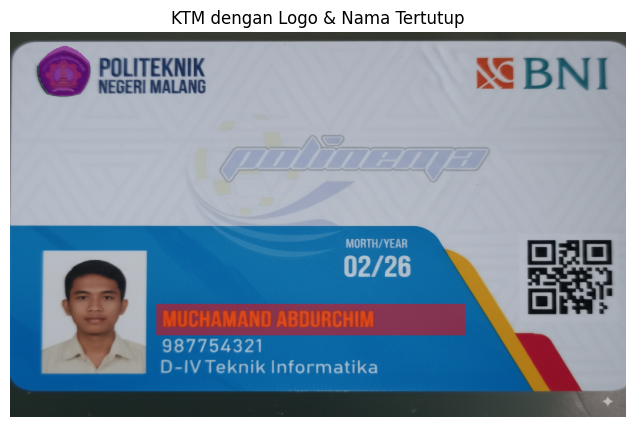

Hasil disimpan di: /content/drive/MyDrive/PCVK/Images/KTM9_masked_final.png


In [10]:
# --- fungsi cover nama ---
def cover_name_area(image, x, y, w, h, color=(0, 255, 0), alpha=0.4):
    """
    Cover area of name with semi-transparent rectangle
    """
    overlay = image.copy()
    cv.rectangle(overlay, (x, y), (x + w, y + h), color, -1)
    cv.addWeighted(overlay, alpha, image, 1 - alpha, 0, image)
    return image

# --- lanjut dari hasil masking logo ---
img_with_name = cover_name_area(result_img.copy(),
                                x=190, y=353, w=400, h=40,
                                color=(0, 0, 255), alpha=0.5)

# --- tampilkan hasil ---
plt.figure(figsize=(8,5))
plt.imshow(cv.cvtColor(img_with_name, cv.COLOR_BGR2RGB))
plt.title("KTM dengan Logo & Nama Tertutup")
plt.axis("off")
plt.show()

# simpan hasil
outpath = '/content/drive/MyDrive/PCVK/Images/KTM-Masked.png'
cv.imwrite(outpath, img_with_name)
print("Hasil disimpan di:", outpath)
